# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів



---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.


Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

## Підготовка даних


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('/Users/olesialev/Downloads/data:/yulu_bike_sharing_dataset.csv')

In [37]:


# Додаткові колонки з індексу datetime
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [27]:
print(f"Набір даних містить {df.shape[0]} рядків та {df.shape[1]} колонок")

df.head()

df.info()

Набір даних містить 10886 рядків та 19 колонок
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  int64  
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  int64  
 4   temp         10886 non-null  float64
 5   atemp        10886 non-null  float64
 6   humidity     10886 non-null  int64  
 7   windspeed    10886 non-null  float64
 8   casual       10886 non-null  int64  
 9   registered   10886 non-null  int64  
 10  count        10886 non-null  int64  
 11  date         10886 non-null  object 
 12  day          10886 non-null  int32  
 13  week         10886 non-null  UInt32 
 14  weekday_num  10886 non-null  int32  
 15  weekday      10886 non-null  object 
 16  year         10886 non-null  int32  
 17  month 

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [38]:
daily_count = df.groupby(df.index.date)['count'].sum()
print(daily_count)

2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-15    5047
2012-12-16    3786
2012-12-17    4585
2012-12-18    5557
2012-12-19    5267
Name: count, Length: 456, dtype: int64


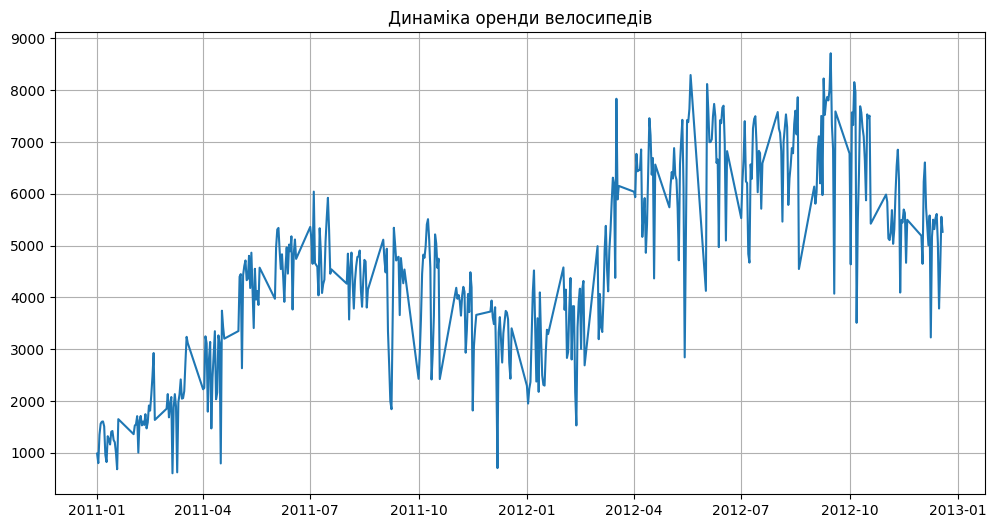

In [40]:
daily_count.plot(
    figsize=(12, 6), title='Динаміка оренди велосипедів', grid=True
    )
plt.show()

1. тому що дані поденні, а попит на оренду велосипедів сильно змінюється день від дня; можна загрегувати за тиждень або місяць, тоді графік буде плавнішим.
2-3. бачимо, що графік має тенденцію до зростання, однак на початку 2012 р. був невеликий спад, який може бути пов'язаний із несезонністю використання велосипедів взимку.
4. цілком очевидно, що максимальний спад відбувається саме взимку, адже попит на оренду велосипедів досить низький, а от влітку бачимо аномально високі значення, які свідчать про позитивну кореляцію між теплою сухою погодою та попитом на оренду велосипедів.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами(кварталами). Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте квартали не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який квартал найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?

In [42]:
season_count = df.groupby(['season'])['count'].mean()
print(season_count)

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64


[Text(0, 0, '116.343'),
 Text(0, 0, '215.251'),
 Text(0, 0, '234.417'),
 Text(0, 0, '198.988')]

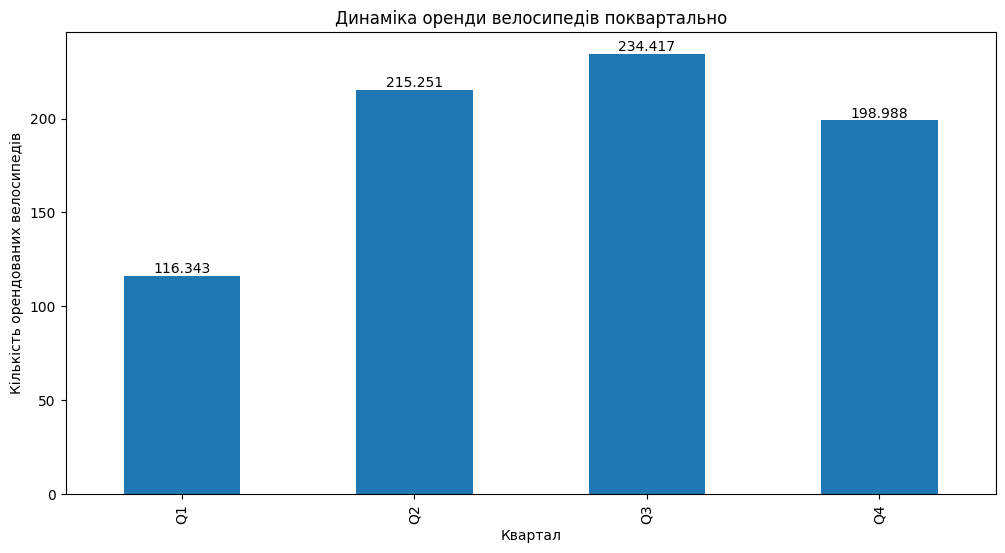

In [61]:
ax=season_count.plot.bar(
    figsize=(12, 6), title='Динаміка оренди велосипедів поквартально',
    xlabel='Квартал',
    ylabel='Кількість орендованих велосипедів')
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

ax.bar_label(ax.containers[0])


1. у третій квартал
2. тому що третій квартал припадає на липень, серпень, вересень - найбільш сприйятливий період для поїздок на велосипеді
3. удвічі

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [60]:
monthly_count = df.groupby(['month'])['count'].mean()
print(monthly_count)

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64


[Text(1, 0, 'Jan'),
 Text(2, 0, 'Feb'),
 Text(3, 0, 'Mar'),
 Text(4, 0, 'Apr'),
 Text(5, 0, 'May'),
 Text(6, 0, 'Jun'),
 Text(7, 0, 'Jul'),
 Text(8, 0, 'Aug'),
 Text(9, 0, 'Sep'),
 Text(10, 0, 'Oct'),
 Text(11, 0, 'Nov'),
 Text(12, 0, 'Dec')]

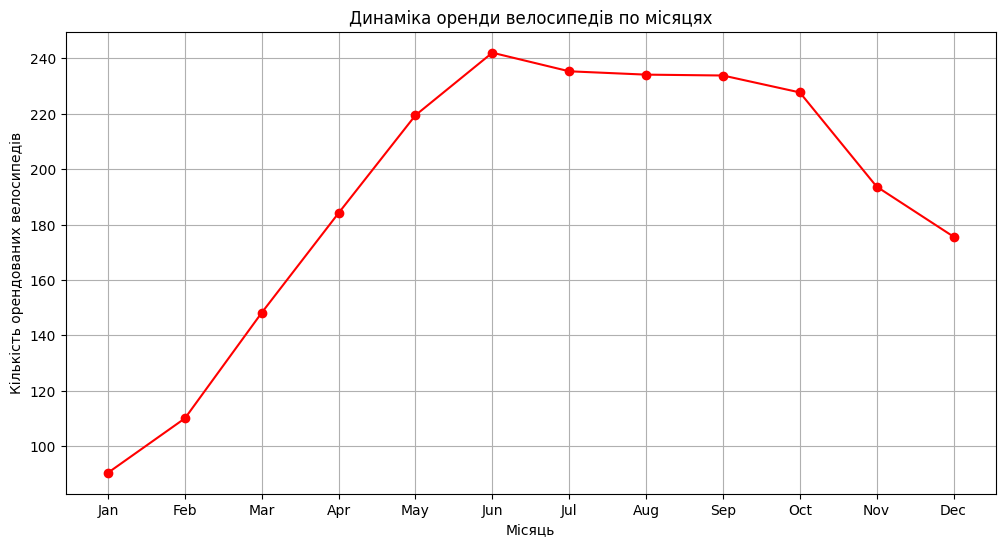

In [69]:
ax=monthly_count.plot(
    kind='line',
    marker='o',
    figsize=(12, 6),
    color='red',
    title='Динаміка оренди велосипедів по місяцях',
    xlabel='Місяць',
    ylabel='Кількість орендованих велосипедів',
    grid=True
);
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun',
                     'Jul','Aug','Sep','Oct','Nov','Dec'])



1. бачимо, що піковий місяць-червень, а вже після червня спостерігається тенденція до спадання.
2. так
3. дощ, сніг та вітер безпосередньо впливають на попит оренди велосипедів протягом року.
Чітко простежується сезонність з піком влітку та мінімумом взимку.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Очікуваний результат:

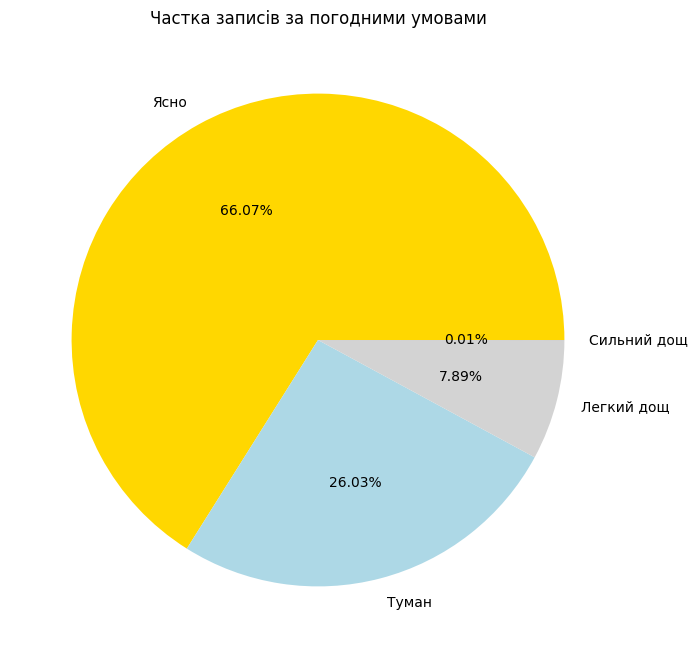

In [74]:
weather_counts = df['weather'].value_counts().sort_index()
print(weather_counts)
weather_labels = [
    'Ясно',
    'Туман',
    'Легкий дощ',
    'Сильний дощ'
]

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


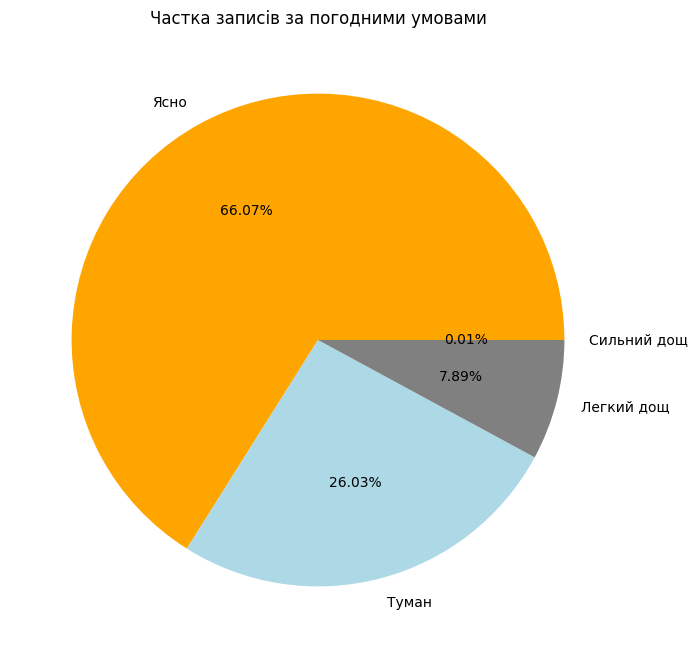

In [86]:
weather_counts.plot.pie(
    figsize=(8, 8),
    autopct='%1.2f%%',
    labels=weather_labels,
    title='Частка записів за погодними умовами',
    ylabel='',
    colors=['orange', 'lightblue', 'gray', 'black']
);

1. ясна погода найбільше переважає.
2. так, один день, частка складає 0,01%
3. у ясну погоду найбільший попит на оренду велосипедів адже це найбільш сприятлива й "безпечна" погода для поїздок на велосипеді, тобто позитивна кореляція.


## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

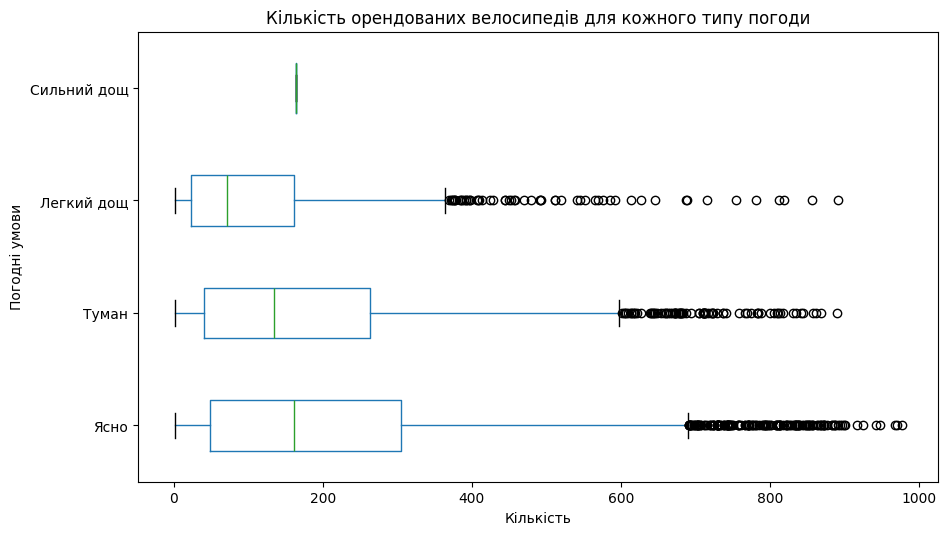

In [99]:
ax=df.boxplot(
    column='count',
    by='weather',
    figsize=(10, 6),
    vert=False,
    grid = False
)
plt.title('Кількість орендованих велосипедів для кожного типу погоди')
plt.suptitle('')  
plt.xlabel('Кількість')
plt.ylabel('Погодні умови')
ax.set_yticklabels(['Ясно',
    'Туман',
    'Легкий дощ',
    'Сильний дощ'])
plt.show()

1.Найбільший загальний розкид спостерігається при погоді Ясно. Тому що графік для погодної умови "Ясно" розтягнутий вздовж осі "Кількість" найбільше.
2.Найбільша кількість і найвищі значення викидів спостерігаються при сонячній погоді.
3.Медіанне значення для Ясно знаходиться найправіше по осі х, тому воно найвище, також значення для Сильного дощу знаходиться приблизно на тому ж рівні, але через брак даних для цієї категорії повноцінно порівнювати медіану некоректно.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

**Увага!** За замовченням буде колір

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

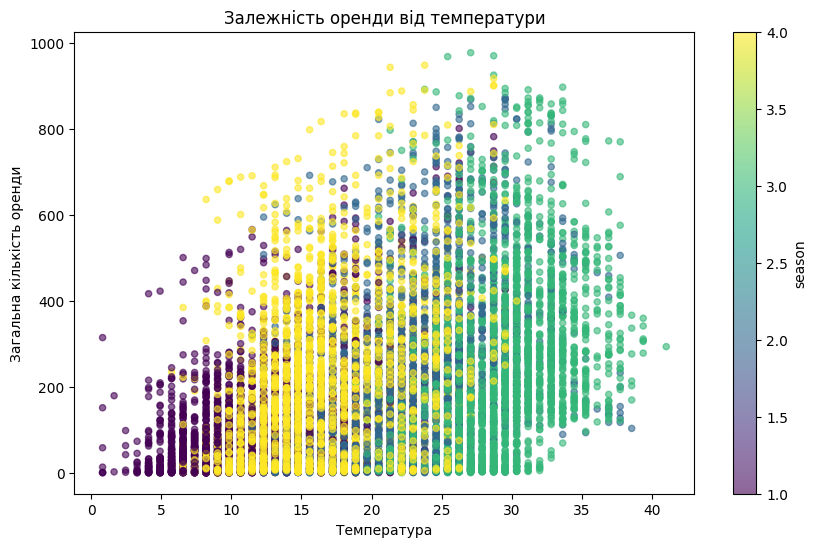

In [104]:
df.plot.scatter(
    x='temp',
    y='count',
    c='season',
    colormap='viridis',
    title='Залежність оренди від температури',
    figsize=(10, 6),
    alpha=0.6
)
plt.xlabel('Температура')
plt.ylabel('Загальна кількість оренди')
plt.show()

Так, між температурою та кількістю оренди існує чіткий позитивний зв'язок:з підвищенням температури кількість орендованих велосипедів збільшується.

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

In [105]:
weekly_avg = df.groupby('weekday')[['casual', 'registered']].mean()
print(weekly_avg)


              casual  registered
weekday                         
Friday     31.001962  166.842381
Monday     29.843972  160.546744
Saturday   63.625000  133.040404
Sunday     57.051298  123.788474
Thursday   24.007083  173.289118
Tuesday    22.979207  166.744639
Wednesday  22.521599  165.889749


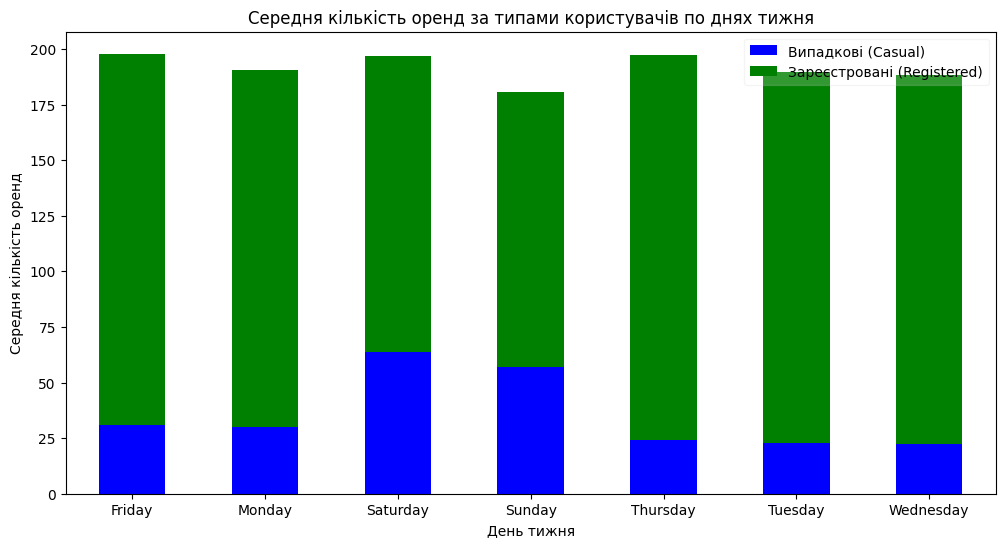

In [121]:
weekly_avg.plot(
    kind='bar',
    stacked=True, 
    figsize=(12, 6),
    color=['blue', 'green'])
plt.title('Середня кількість оренд за типами користувачів по днях тижня')
plt.xlabel('День тижня')
plt.ylabel('Середня кількість оренд')
plt.legend(['Випадкові (Casual)', 'Зареєстровані (Registered)'],framealpha=0.2)
plt.xticks(rotation=0) 

plt.show()


1. Зареєстровані користувачі (зелена частина стовпців) найактивніше орендують велосипеди у робочі дні. У вихідні кількість оренд від цієї групи помітно знижується.
2. Зареєстровані користувачі використовують велосипеди як транспорт для роботи чи навчання. Тому ми бачимо стабільно високий попит у будні та спад у вихідні.
На графіку видно, що сині стовпці значно вищі у суботу та неділю. Це свідчить про те, що Casual використовують велосипеди переважно для дозвілля, прогулянок та туризму у вільний час.